In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)


In [42]:
iris = pd.read_csv("./Desktop/Iris1.csv")
iris.head()

,ID,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

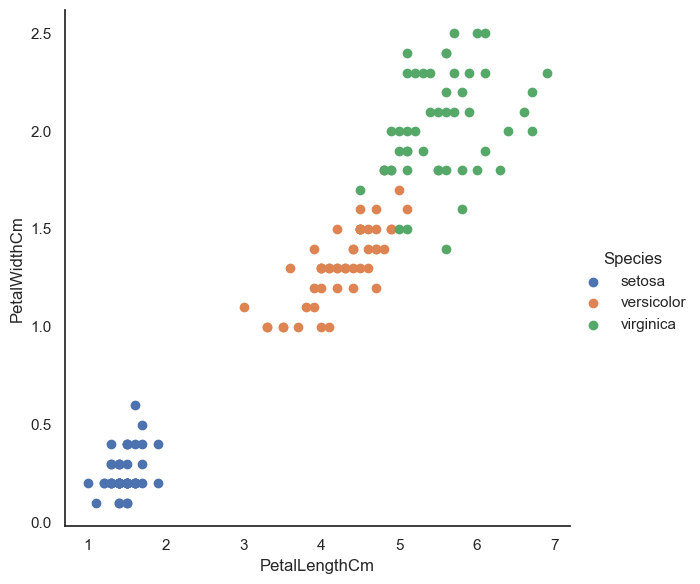

In [4]:
sns.FacetGrid(iris, hue="Species",height=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

Logistic Regression

In [6]:
flower_mapping = {'setosa': 0,'versicolor': 1,'virginica':2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [7]:
iris.head()

,ID,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=iris[['Species']].values 


###  Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X, y)

LogisticRegression()

### Accuracy

In [15]:
model.score(X,y)

0.9733333333333334

In [16]:
expected = y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### summarize the fit of the model

In [18]:
from sklearn import metrics

In [19]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [20]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


### Regularization

In [21]:
model = LogisticRegression(C=20,penalty='l2' )

In [22]:
model.fit(X,y)

LogisticRegression(C=20)

In [23]:
model.score(X,y)

0.98

In [24]:
iris.isnull().sum()

ID               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x1a76f2d24d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a770415850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7703e7190>],
 'medians': [<matplotlib.lines.Line2D at 0x1a770416f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a770414990>],
 'means': []}

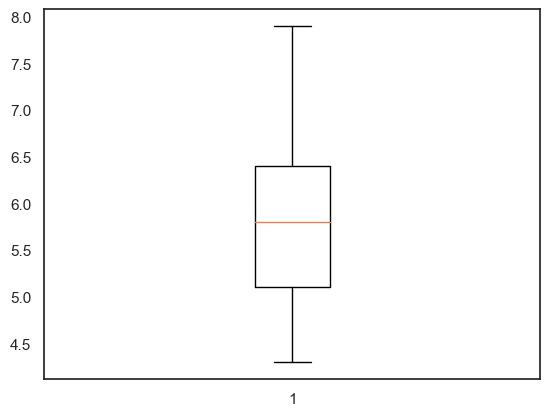

In [25]:
plt.boxplot(iris['SepalLengthCm'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a770b5c5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a770b5dad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a76e8a44d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a770b5f150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a770b51250>],
 'means': []}

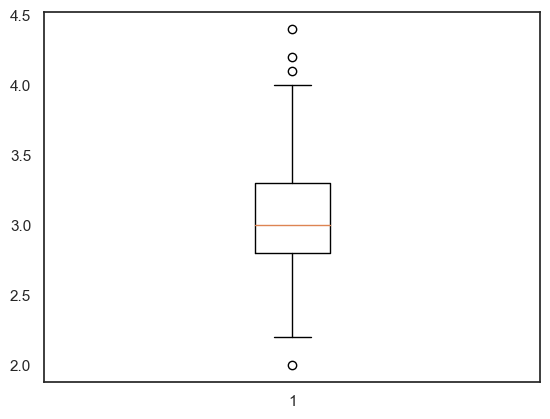

In [26]:
plt.boxplot(iris['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a76ef931d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a76ef91790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a76ef93f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a76ef90450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a770b1f4d0>],
 'means': []}

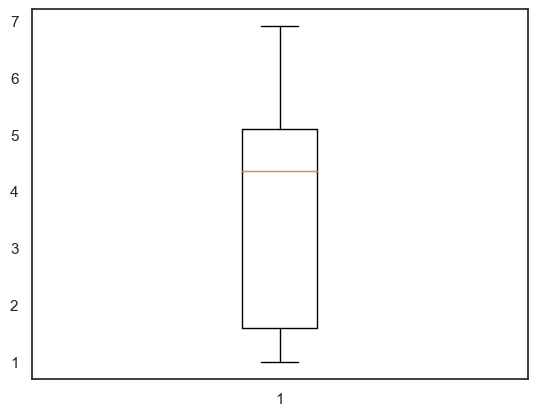

In [27]:
plt.boxplot(iris['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a770bd3a50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a770bedc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a770be3990>],
 'medians': [<matplotlib.lines.Line2D at 0x1a770bef110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a770befb50>],
 'means': []}

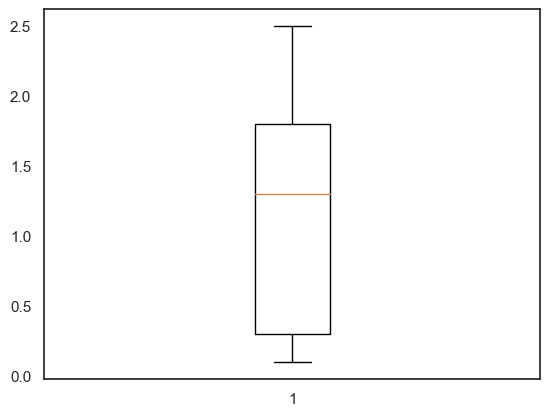

In [28]:
plt.boxplot(iris['PetalWidthCm'])

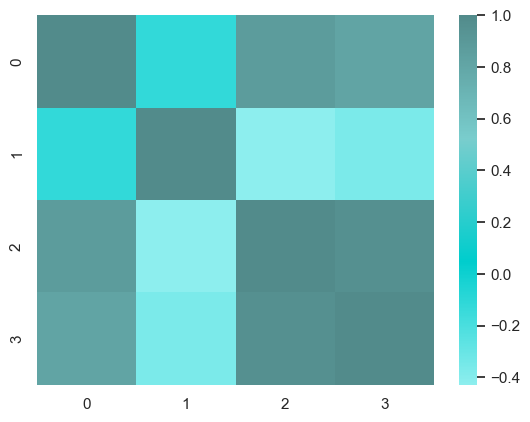

In [64]:
"""import matplotlib.colors as mcolors
#sns.heatmap(iris.corr())
custom_colors = ['#00EEEE','#8DEEEE','#79CDCD','#528B8B']  # Red, Green, Blue

# Create a custom colormap using custom colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom Colormap", custom_colors)

# Create a heatmap with the custom colormap
sns.heatmap(iris.corr(), cmap=custom_cmap)  """

# Calculate the correlation matrix using NumPy
corr_matrix = np.corrcoef(X, rowvar=False)

# Define custom colors for the heatmap
custom_colors = ['#8DEEEE','#00CDCD','#79CDCD','#528B8B']  # Teal shades

# Create a custom colormap using custom colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom Colormap", custom_colors)

# Create a heatmap with the custom colormap
sns.heatmap(corr_matrix, cmap=custom_cmap)

# Show the heatmap
import matplotlib.pyplot as plt
plt.show()

# Summarize the fit of the mode

In [40]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


# using scikit-learn library

In [48]:
# Import necessary libraries

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [50]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

